In [2]:
import pandas as pd
import pymysql as pm
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Coonection à server mysql
connection = pm.connect(host = 'localhost',
                       user = 'root',
                       password = 'Tashe@1129',
                       database = 'series')
                        
try:                       
    cur = connection.cursor()
    print("Connection successfull")
    
except mysql.connector.Error as error:
    print("Error in connection: ",error)

Connection successfull


In [8]:
query = '''SELECT Saison,Numero_episode,Rating FROM episode;'''
results1 = pd.read_sql(query,connection)
results1

,Saison,Numero_episode,Rating
0,1,1,9.1
1,1,10,9.5
2,1,2,8.8
3,1,3,8.7
4,1,4,8.8
...,...,...,...
68,8,2,7.8
69,8,3,7.4
70,8,4,5.4
71,8,5,5.9


<AxesSubplot:xlabel='Saison'>

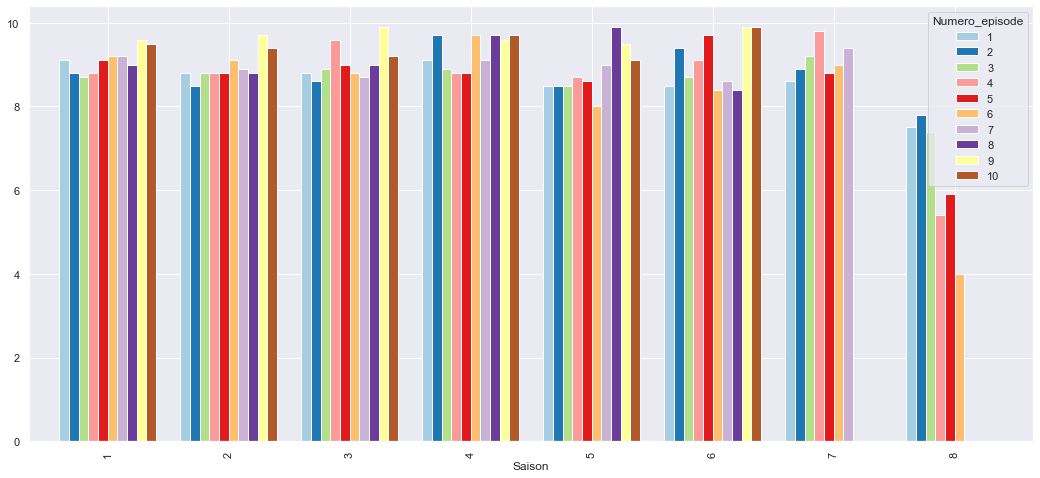

In [13]:
results1.pivot('Saison', 'Numero_episode', 'Rating').plot(kind='bar',figsize=(18,8),colormap='Paired', width=0.8)

In [15]:
query = '''SELECT a.Nom_acteur, r.Nom_role, COUNT(DISTINCT(e.ID_episode)) AS nombre_episodes FROM episode e
            INNER JOIN episode_role er USING(ID_episode)
            INNER JOIN rôle r USING(ID_role)
            INNER JOIN acteur_role ar USING(ID_role)
            INNER JOIN acteur a USING(ID_acteur)
            GROUP BY a.ID_acteur 
            HAVING  nombre_episodes > 10
            ORDER BY nombre_episodes DESC;'''

results2 = pd.read_sql(query,connection)
results2

,Nom_acteur,Nom_role,nombre_episodes
0,Peter Dinklage,Tyrion Lannister,67
1,Lena Headey,Cersei Lannister,62
2,Emilia Clarke,Daenerys Targaryen,62
3,Kit Harington,Jon Snow,62
4,Sophie Turner,Sansa Stark,59
5,Maisie Williams,Arya Stark,59
6,Nikolaj Coster-Waldau,Jaime Lannister,55
7,Alfie Allen,Theon Greyjoy,45
8,John Bradley,Samwell Tarly,44
9,Iain Glen,Jorah Mormont,42


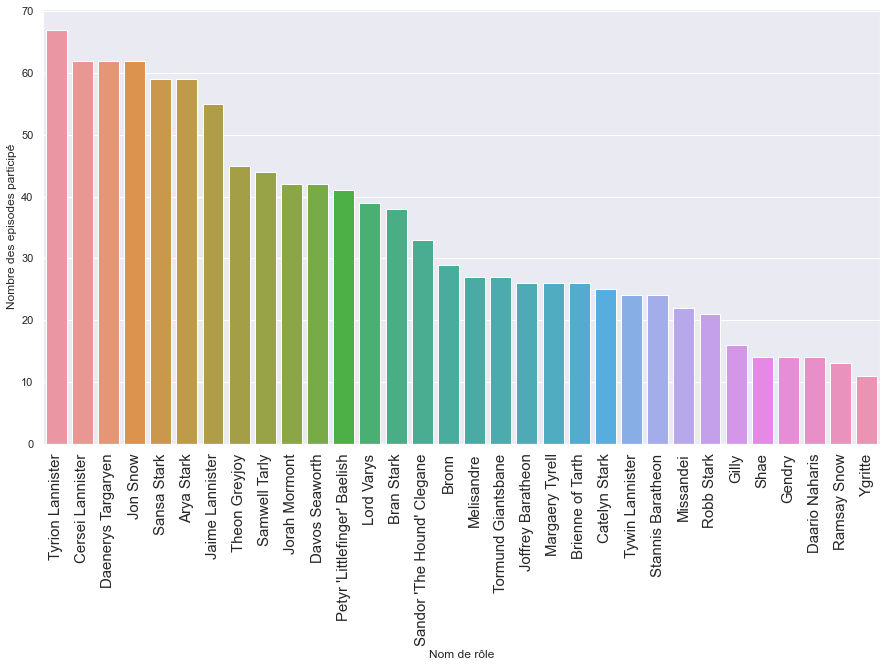

In [20]:
plt.figure(figsize=(15, 8))
sns.set(style="darkgrid")
sns.barplot(x=results2['Nom_role'], y=results2['nombre_episodes'])
plt.xticks(rotation=90, fontsize = 15)
plt.xlabel("Nom de rôle")
plt.ylabel("Nombre des episodes participé")
# plt.yticklabels(results['Nom_acteur'])
plt.show()

In [12]:
query = '''SELECT * FROM episode e
            INNER JOIN episode_role er USING(ID_episode)
            INNER JOIN rôle r USING(ID_role)
            INNER JOIN acteur_role ar USING(ID_role)
            INNER JOIN acteur a USING(ID_acteur);'''

results = pd.read_sql(query,connection)
results

,ID_acteur,ID_role,ID_episode,Numero_episode,Nom_episode,Saison,ID_serie,Rating,Lien,Nom_role,Nom_acteur
0,1,1,S1 - Ep1,1,Winter Is Coming,1,1,9.1,https://www.imdb.com/title/tt1971833/?ref_=tte...,Eddard 'Ned' Stark,Sean Bean
1,1,1,S1 - Ep10,10,Fire and Blood,1,1,9.5,https://www.imdb.com/title/tt4283094/?ref_=tte...,Eddard 'Ned' Stark,Sean Bean
2,1,1,S1 - Ep2,2,The Kingsroad,1,1,8.8,https://www.imdb.com/title/tt2178788/?ref_=tte...,Eddard 'Ned' Stark,Sean Bean
3,1,1,S1 - Ep3,3,Lord Snow,1,1,8.7,https://www.imdb.com/title/tt4283074/?ref_=tte...,Eddard 'Ned' Stark,Sean Bean
4,1,1,S1 - Ep4,4,"Cripples, Bastards, and Broken Things",1,1,8.8,https://www.imdb.com/title/tt1480055/?ref_=tte...,Eddard 'Ned' Stark,Sean Bean
...,...,...,...,...,...,...,...,...,...,...,...
1309,109,111,S8 - Ep5,5,The Bells,8,1,5.9,https://www.imdb.com/title/tt3866838/?ref_=tte...,Harry Strickland,Marc Rissmann
1310,110,112,S8 - Ep5,5,The Bells,8,1,5.9,https://www.imdb.com/title/tt3866838/?ref_=tte...,Xela,Alexis Raben
1311,111,113,S8 - Ep5,5,The Bells,8,1,5.9,https://www.imdb.com/title/tt3866838/?ref_=tte...,Lannister Soldier,Matthew Wolf
1312,112,114,S8 - Ep5,5,The Bells,8,1,5.9,https://www.imdb.com/title/tt3866838/?ref_=tte...,Martha,Bronte Carmichael
